# Gabilan Mesa, CA, Demo #6

## Load *Streamlines* package

In [1]:
import streamlines

## Initiate *Streamlines* workflow

Choose the JSON parameters file we want to work with. The extension `.json` is automatically added.

In [2]:
JSON_parameters_file = 'GabilanMesa6'

Initialize streamline analysis.

In [3]:
sl = streamlines.run( parameters_file=JSON_parameters_file, \
                        do_geodata = False, \
                        do_preprocess = False, \
                        do_condition=True, \
                        do_trace = False, \
                        do_analysis=False, \
                        do_mapping=False, \
                        do_plot=False, \
                        do_display=True, \
                        do_save=False )


Tue 2018-08-14 17:45:40 JST+0900

**Initialization begin**
Loaded JSON parameters file "/Users/colinstark/Work/Streamlines/slm/json/GabilanMesa6.json"
slm git:
[['commit b151accf316db71acf6ca1e97116442648e2f7dc',
  'Author: Colin Stark',
  'Date:   Sun Aug 12 10:48:42 2018 +0900',
  '    Several key HSL improves: FM, ch %le thresholds, plot params; HSL '
  'solid']]
slmnb git:
[['commit ccd1021bece27428fe55ca122aea285a89787f08',
  'Author: Colin Stark',
  'Date:   Tue Jun 26 20:06:54 2018 +0900',
  '    Self sync: Big "bug" fixes: ch mapping, ridges & masking, HSL distbn"']]
slmdata git:
[['commit ebec4d15fce4f5291086f119daf4b4e8f842d9fb',
  'Author: Colin Stark',
  'Date:   Mon May 14 19:27:53 2018 +0900',
  '    Add Ikawa ROI; replace Gabilan DTMs w pit filled']]
**Initialization end**



## Import DTM

In [4]:
sl.geodata.do()


**Geodata begin**
Reading DTM from GeoTIFF file "/Users/colinstark/Work/Streamlines/slmdata/GabilanMesa/GabilanMesa_res2m_fillsinks0p01.tif"
(683480.0, 2.0, 0.0, 4011653.0, 0.0, -2.0)
DTM size: 4250 x 3077 = 13,077,250 pixels
DTM pixel size: 2.0m
DTM origin:
  - bottom-left pixel center: [683480.00mE, 4005499.00mN]
  - bottom-left pixel corner: [683479.00mE, 4005498.00mN]
ROI pixel bounds:  [[0, 1919], [1920, 2799]]
ROI pixel grid:  1920 x 880 = 1,689,600 pixels
ROI pixel-edge boundaries (assuming pixel-as-area)
  - in pixel units: [x: 0.0<=>1920.0] , [y: 1920.0<=>2800.0]
  - in meters:      [x: 0.0<=>3840.0] , [y: 3840.0<=>5600.0]
Reading basins from GeoTIFF file "/Users/colinstark/Work/Streamlines/slmdata/GabilanMesa/GabilanMesa_res2m_fillsinks0p01_basins.tif"
(683480.0, 2.0, 0.0, 4011653.0, 0.0, -2.0)


ERROR 1: NUMPY driver was compiled against GDAL 2.2, but the current library version is 2.4


Mask out all but basin numbers [133]
**Geodata end**



Recording figure "roi_shaded_relief"


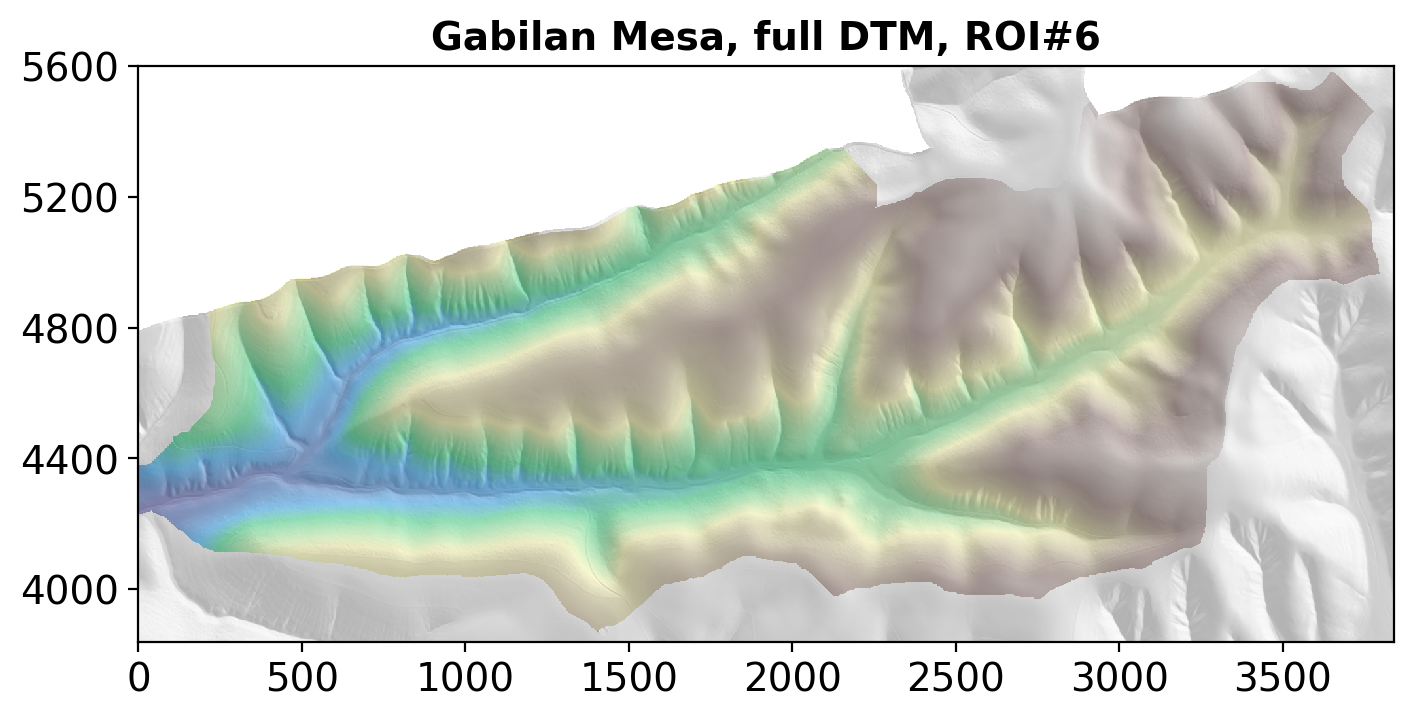

In [5]:
sl.plot.plot_roi_shaded_relief(interp_method='none')

## Preprocess DTM (fix loops etc)

In [6]:
sl.preprocess.do()


**Preprocess begin**
Precondition gradient vector field by fixing loops & blockages
Finding blockages...found 504...done
Finding and fixing loops...
...done
Fixing blockages...
...done
Mask out bad uv pixels...done
**Preprocess end**



## Trace streamlines

In [7]:
%autosave 0
%time sl.trace.do()
%autosave 120

Autosave disabled

**Trace begin**
Integrating trajectories...
Generating seed points...shuffling...padding for 32 CL work items/group: 1000->1024...done
GPU/OpenCL device global memory limit for streamline trajectories: 3.6GB
GPU/OpenCL device memory required for streamline trajectories: 4MB => no need to chunkify
Total number of kernel instances: 1,024
Number of chunks = seed point array divisor: 1
Chunk size = number of kernel instances per chunk: 1,024
Downstream: downup=0 sgn(uv)=+1.0 chunk=0 seeds: 0+1000 => 1000
Seed point buffer size = 1000.0*8 bytes
0.0% 62.5% 100.0% 
Upstream:   downup=1 sgn(uv)=-1.0 chunk=0 seeds: 0+1000 => 1000
Seed point buffer size = 1000.0*8 bytes
0.0% 62.5% 100.0% 
Building streamlines compressed array
Streamlines actual array allocation:  size=2MB
Computing streamlines statistics
   downstream                            upstream                         
          min         mean          max       min        mean          max
l    1.213569   950.64727

Autosaving every 120 seconds


In [8]:
import pandas as pd
ddf=pd.DataFrame(sl.trace.traj_stats_df.loc['downstream'].T)
udf=pd.DataFrame(sl.trace.traj_stats_df.loc['upstream'].T)
ddf.style.format("{:.3g}").set_properties(**{'font-size':'140%'})\
    .set_caption('Downstreamline statistics:')
udf.style.format("{:.3g}").set_properties(**{'font-size':'140%'})\
    .set_caption('Upstreamline statistics:')

Autosave disabled
Plotting all 1,000 down streamlines
Progress: 1%...2%...3%...4%...5%...6%...7%...8%...9%...10%...11%...12%...13%...14%...15%...16%...17%...18%...19%...20%...21%...22%...23%...24%...25%...26%...27%...28%...29%...30%...31%...32%...33%...34%...35%...36%...37%...38%...39%...40%...41%...42%...43%...44%...45%...46%...47%...48%...49%...50%...51%...52%...53%...54%...55%...56%...57%...58%...59%...60%...61%...62%...63%...64%...65%...66%...67%...68%...69%...70%...71%...72%...73%...74%...75%...76%...77%...78%...79%...80%...81%...82%...83%...84%...85%...86%...87%...88%...89%...90%...91%...92%...93%...94%...95%...96%...97%...98%...99%...100%
Plotting all 1,000 up streamlines
Progress: 1%...2%...3%...4%...5%...6%...7%...8%...9%...10%...11%...12%...13%...14%...15%...16%...17%...18%...19%...20%...21%...22%...23%...24%...25%...26%...27%...28%...29%...30%...31%...32%...33%...34%...35%...36%...37%...38%...39%...40%...41%...42%...43%...44%...45%...46%...47%...48%...49%...50%...51%...52%..

Autosaving every 120 seconds


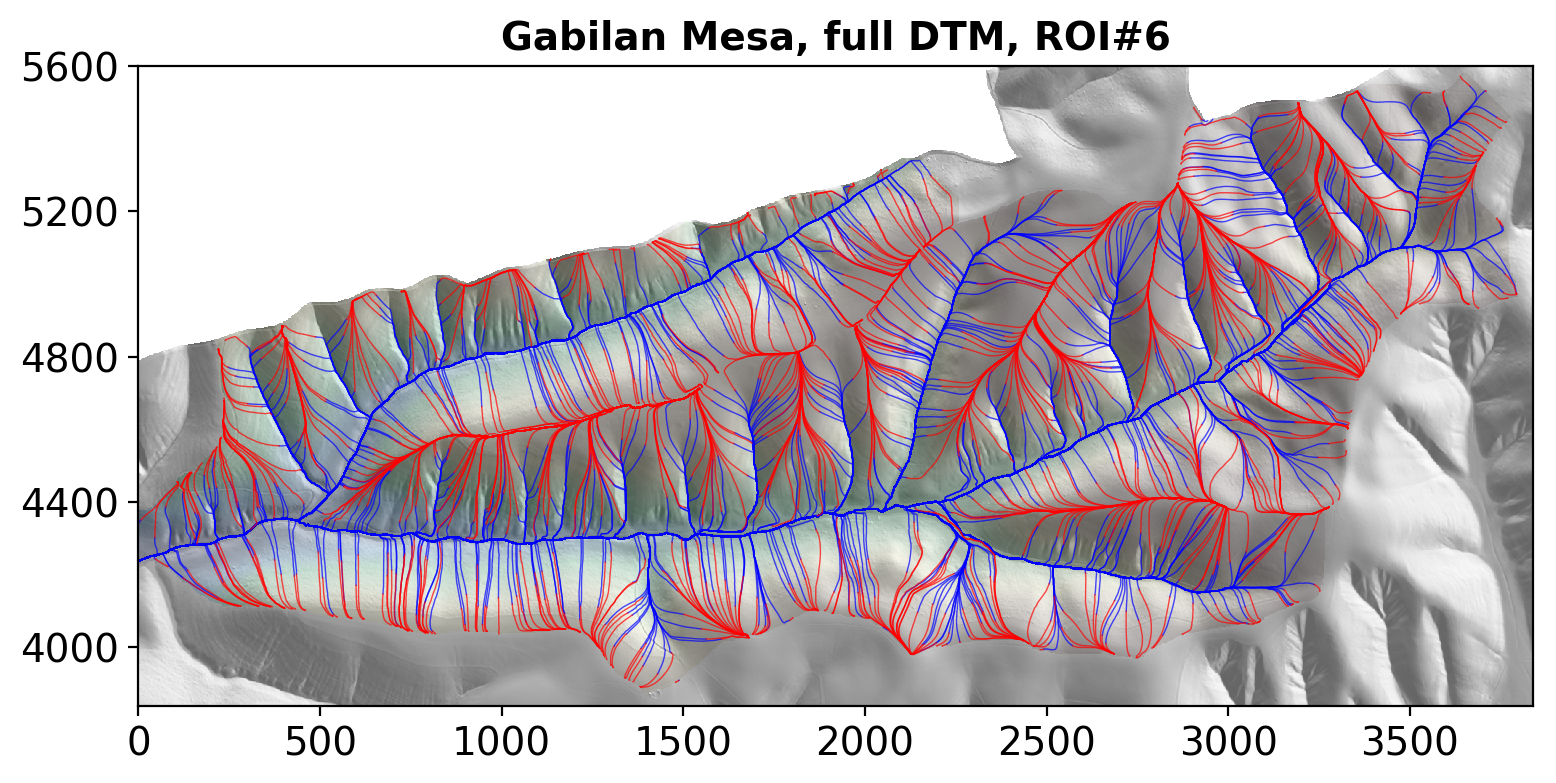

In [9]:
%autosave 0
sl.plot.plot_streamlines(window_size_factor=3)
%autosave 120

## Viz streamline flow concentrations

In [10]:
# sl.plot.plot_flow_maps(window_size_factor=3)

## Analyze streamline distributions

In [11]:
# sl.analysis.do()

In [12]:
# sl.plot.plot_distributions()

## Map channels, segments & hillslope lengths

In [13]:
sl.mapping.pass1()


**Pass#1 begin**
Channels...done
Connecting channel pixels...
...done
Thinning channels...skeletonizing...done
Mapping channel heads...
...done
Counting down channels...
...done
Flagging down channels...
...done
Labeling confluences...
...done
Flagging down channels...
...done
Flagging down channels...
...done
Flagging down channels...
...done
Segmenting channels...number of segments=37
...done
Linking hillslopes...
...done
Segmenting hillslopes...
...done
Subsegmenting left & right flanks...number of subsegments=74
...done
Prepare for mapping HSL from midslopes
Midslopes...done
Ridges...done
**Pass#1 end**


In [14]:
sl.mapping.pass2()


**Pass#2 begin**
0.0% -37 
Channel threshold = 122.3m
FMM mean HSL   = 118.2m
Trace mean HSL = 131.9m
1.4% -36 
Channel threshold = 227.4m
FMM mean HSL   = 133.1m
Trace mean HSL = 158.5m
2.7% -35 
Channel threshold = 90.0m
FMM mean HSL   = 82.6m
Trace mean HSL = 85.1m
4.1% -34 
Channel threshold = 197.7m
FMM mean HSL   = 112.5m
Trace mean HSL = 141.6m
5.4% -33 
Channel threshold = 105.9m
FMM mean HSL   = 82.5m
Trace mean HSL = 117.0m
6.8% -32 
Channel threshold = 188.9m
FMM mean HSL   = 133.3m
Trace mean HSL = 160.8m
8.1% -31 
Channel threshold = 186.6m
FMM mean HSL   = 117.9m
Trace mean HSL = 188.9m
9.5% -30 
Channel threshold = 290.0m
FMM mean HSL   = 27.0m
Trace mean HSL = 53.0m
10.8% -29 
Channel threshold = 39.7m
FMM mean HSL   = 81.4m
Trace mean HSL = 88.0m
12.2% -28 
Channel threshold = 216.4m
FMM mean HSL   = 101.2m
Trace mean HSL = 146.9m
13.5% -27 
Channel threshold = 164.5m
FMM mean HSL   = 58.4m
Trace mean HSL = 79.7m
14.9% -26 
Channel threshold = 150.0m
FMM mean HSL   = 

In [15]:
sl.mapping.pass3()


**Pass#3 begin**
Connecting channel pixels...
...done
Thinning channels...skeletonizing...done
Mapping channel heads...
...done
Counting down channels...
...done
Flagging down channels...
...done
Mapping hillslope lengths from midslopes...dilation with 51m (25-pixel) width filter...mean filtering with 60m (30-pixel) diameter disk...done
Computing hillslope aspect with median filter radii 4m (slope), 50m (uv)...done
Computing hillslope length-aspect function...done
Computing hillslope length-aspect statistics...done
**Pass#3 end**


## Viz channels & segments

Recording figure "channels"
Recording figure "label"


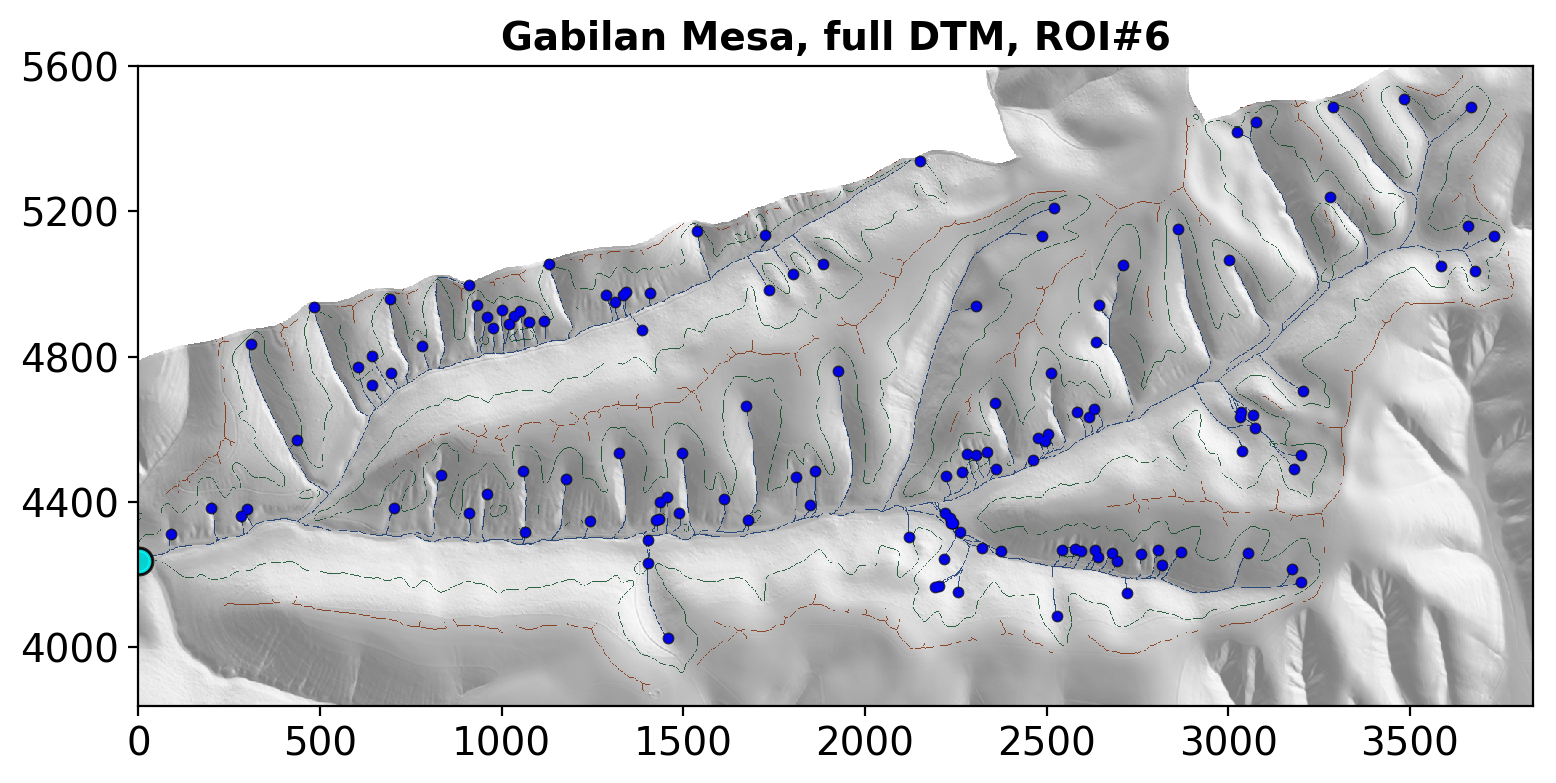

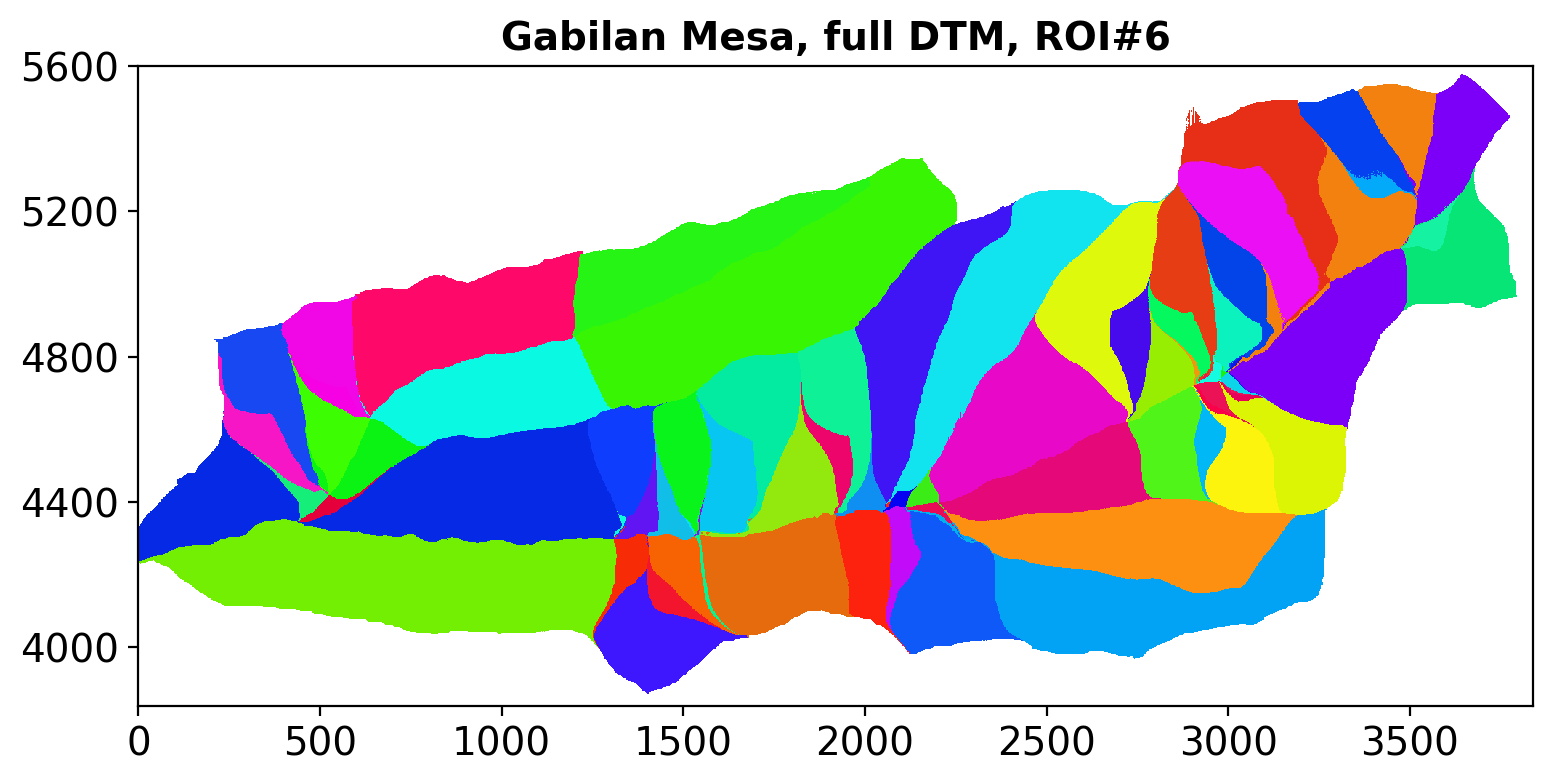

In [16]:
sl.plot.plot_channels(window_size_factor=3)
sl.plot.plot_segments(window_size_factor=3)

## Viz hillslope lengths

In [17]:
sl.plot.contour_hsl_colorbar_size=7


Recording figure "hsl"


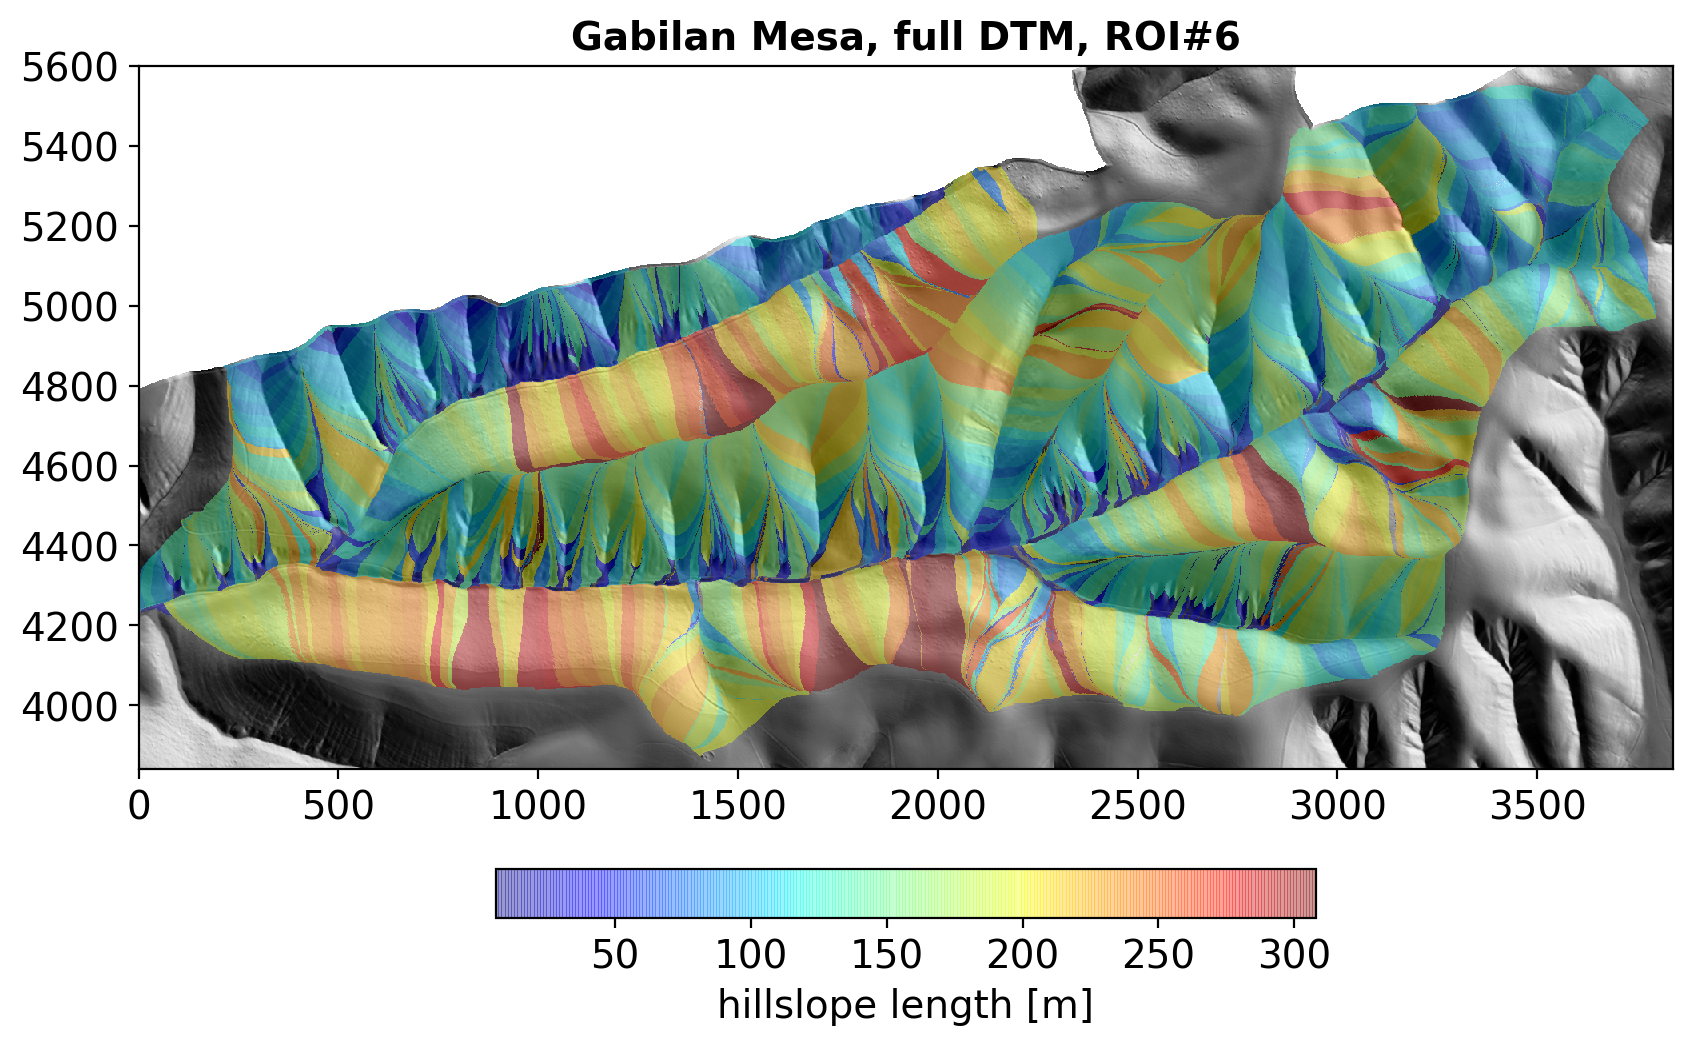

In [18]:
sl.plot.plot_hsl(window_size_factor=3.3)

Recording figure "hsl_contours"


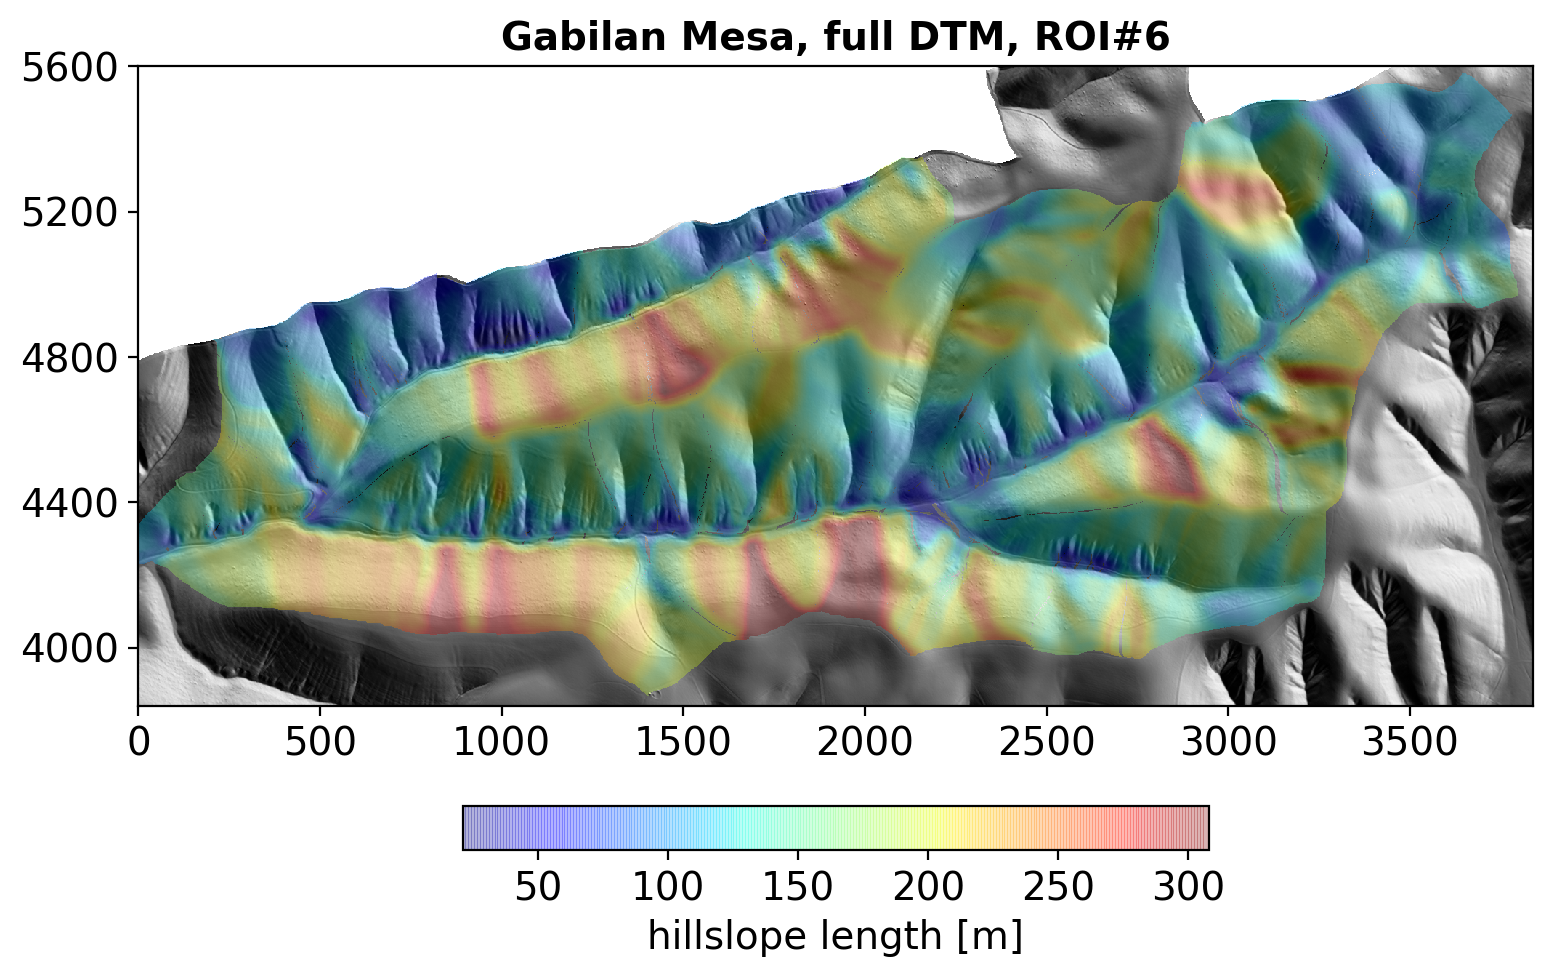

In [19]:
sl.plot.plot_hsl_contoured(window_size_factor=3)

## Viz aspect, hillslope length

Recording figure "aspect"


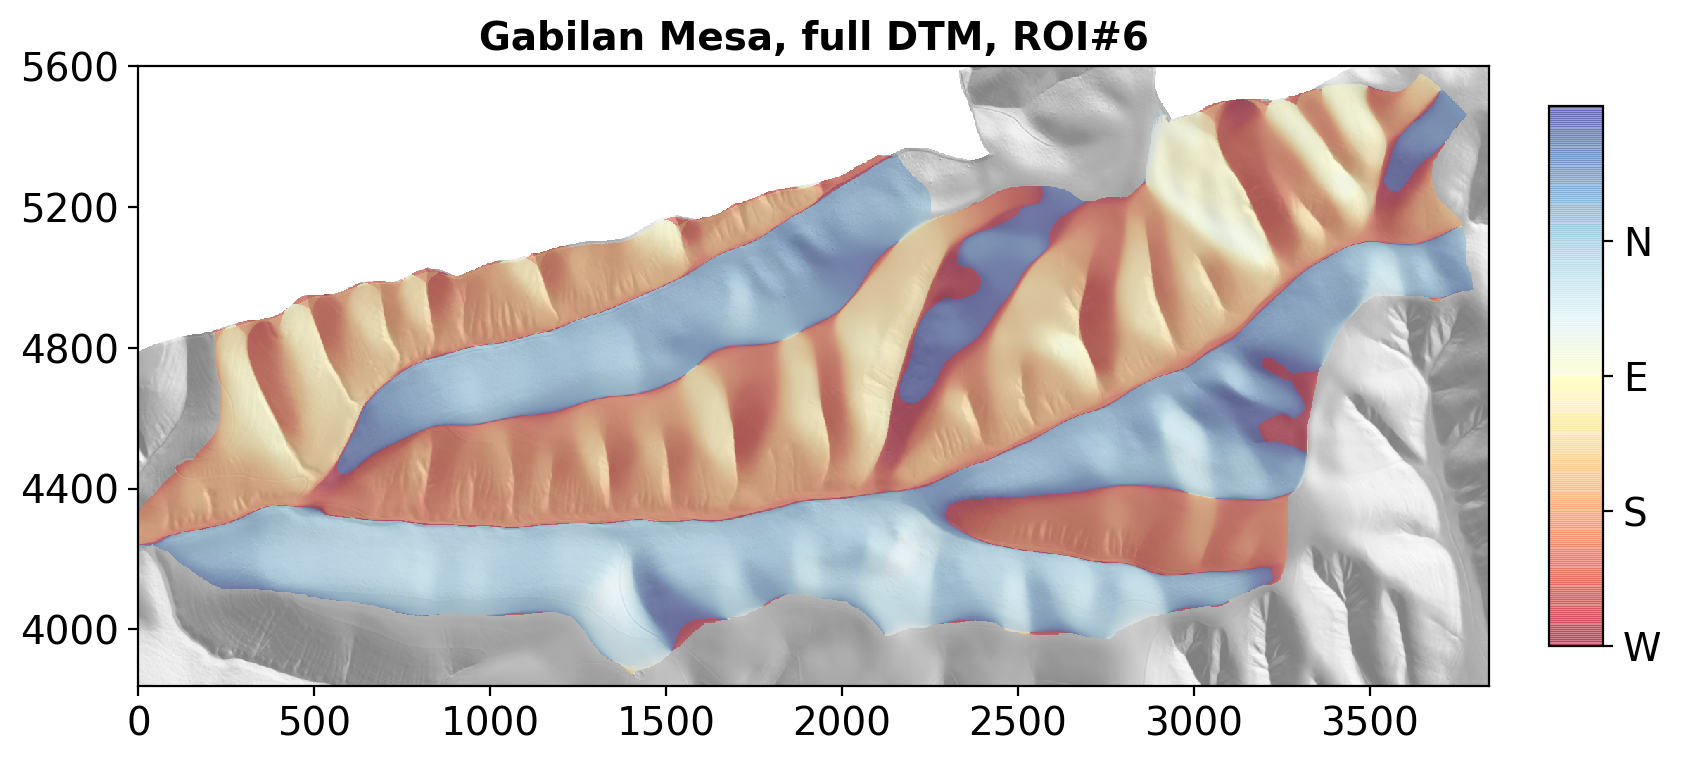

In [20]:
sl.plot.plot_aspect(window_size_factor=3.15)

In [21]:
sl.mapping.check_hsl_ns_disparity()

HSL mean ± σ(split), σ(all):	      160.2m ± 14.2m (split) 29.7m (all)
HSL N-S disparity:		      185.0mN vs 135.4mS   ∆≈49.6m
HSL N-S rel disparity vs variation:   31.0% (49.6m) NS vs 8.9% (14.2m)
HSL N-S disparity signal-noise ratio: ∆/σ = 3.5
					=> strong north bias
N-facing vs S-facing HSL distribution comparison tests
  for f(HSL_N,S) with N,S bounds 45°<|±aspect|<135° from east
D_alpha =  c(alpha)*0.00738855
Kolmogorov-Smirnov: 0.41 p=0
Mann-Whitney:       0.23 p=0
Rank-sum:           127.1 p=0
Student's t:        149.3 p=0
Welch:              155.9 p=0
P-P:                +78%


Recording figure "hsl_aspect_distribution"


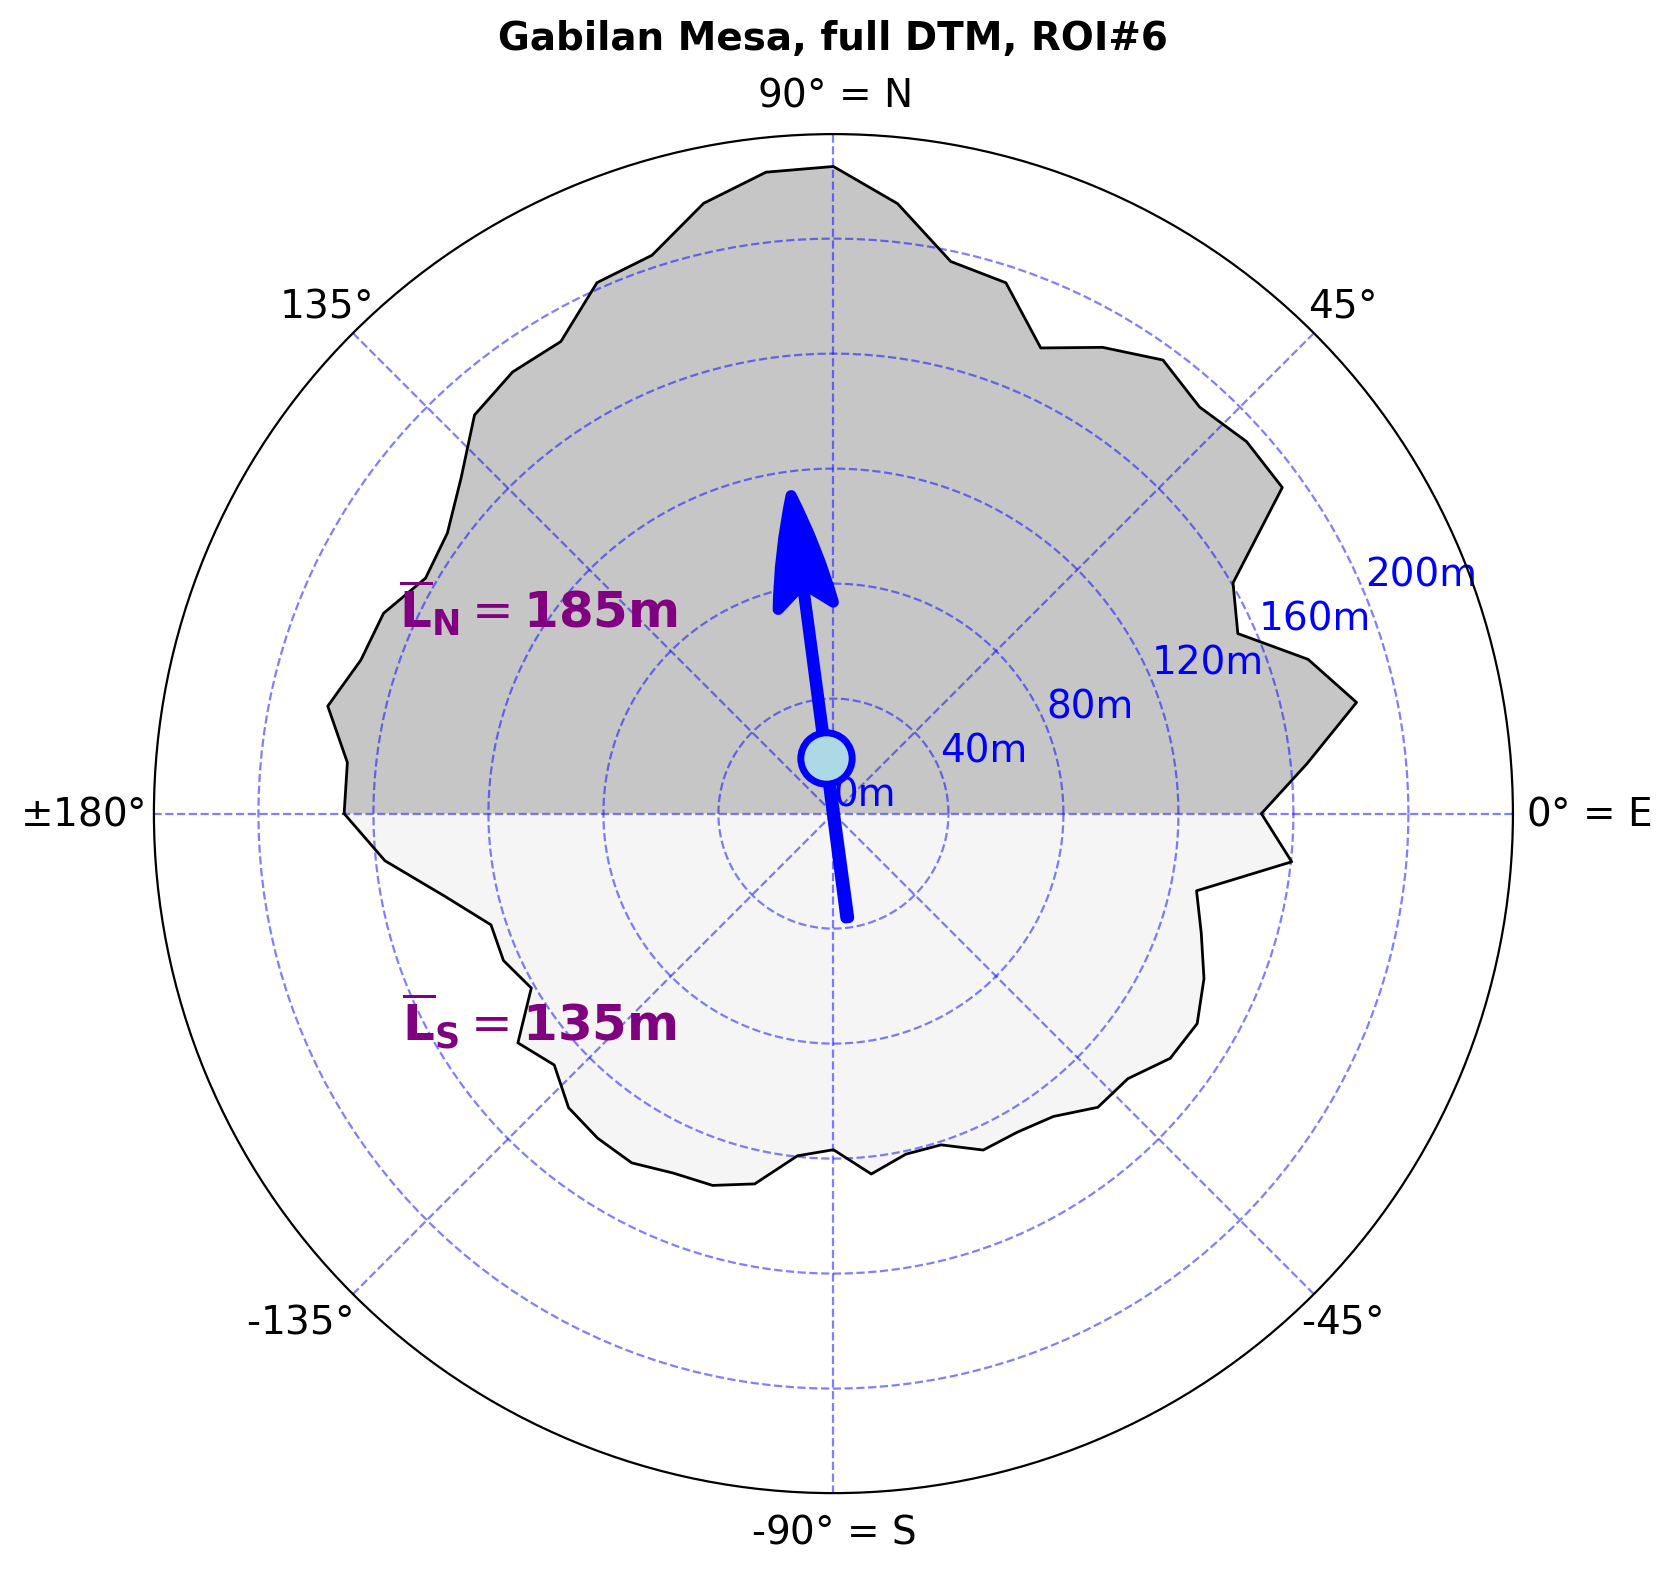

In [22]:
sl.plot.plot_hsl_aspect_distribution(window_size_factor=3)

## Hillslope length stats

Plotting hillslope length distributions...
Recording figure "hsl_nsall_distbn"
Recording figure "hsl_ns_qq"
Recording figure "hsl_ns_pp"


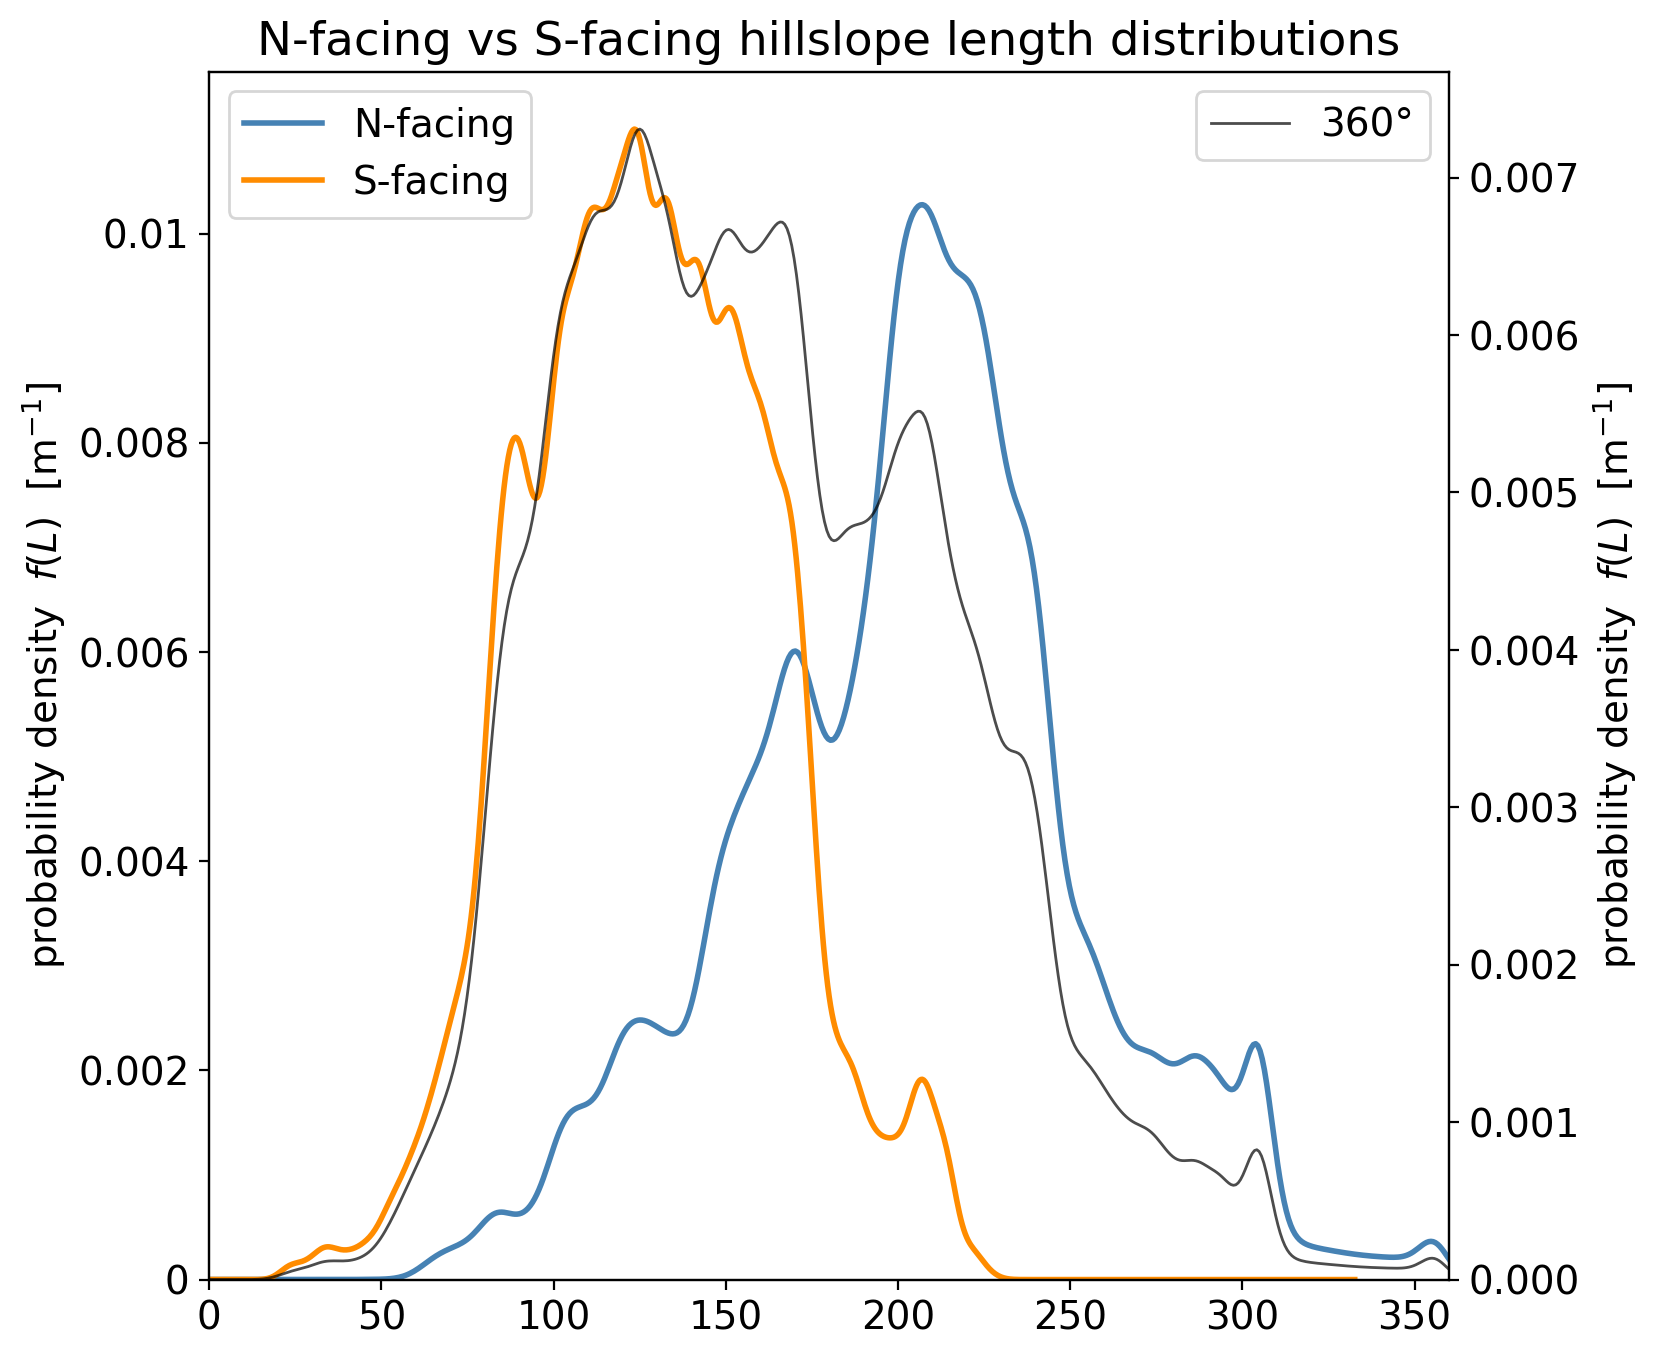

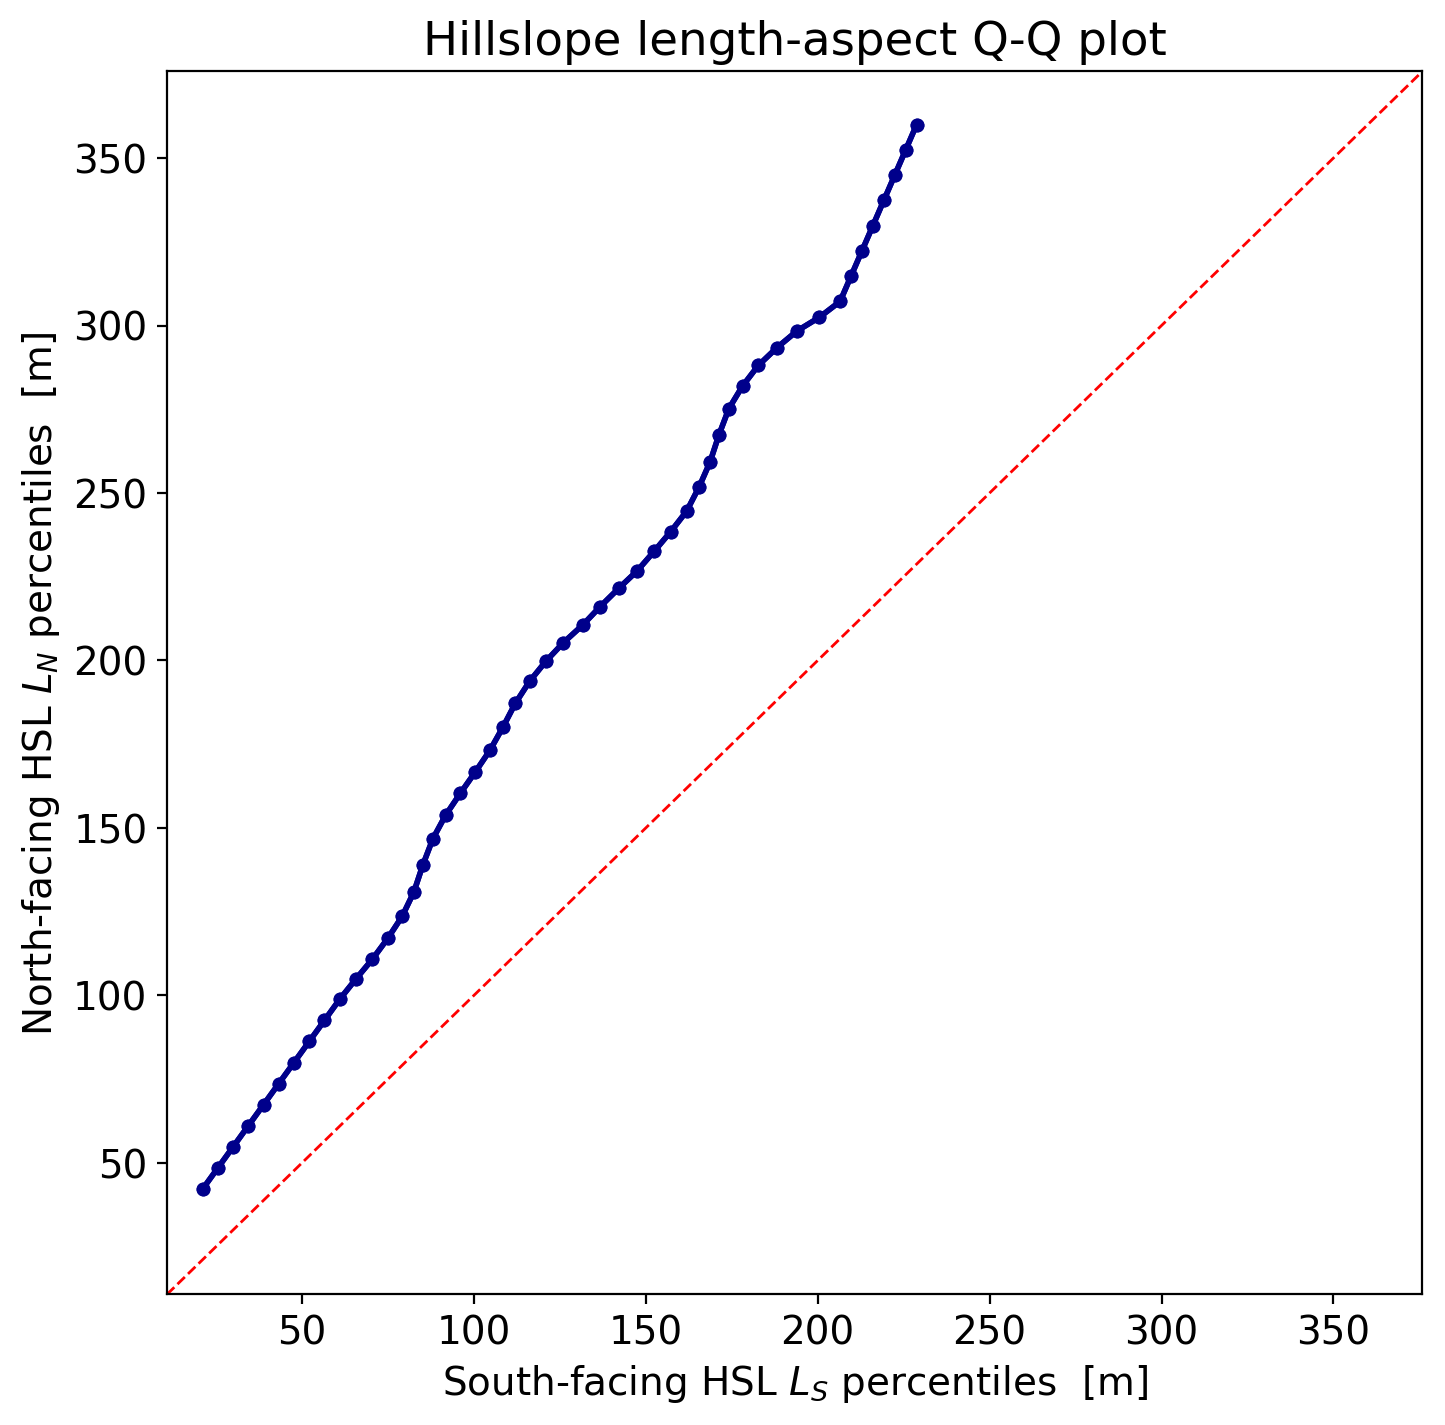

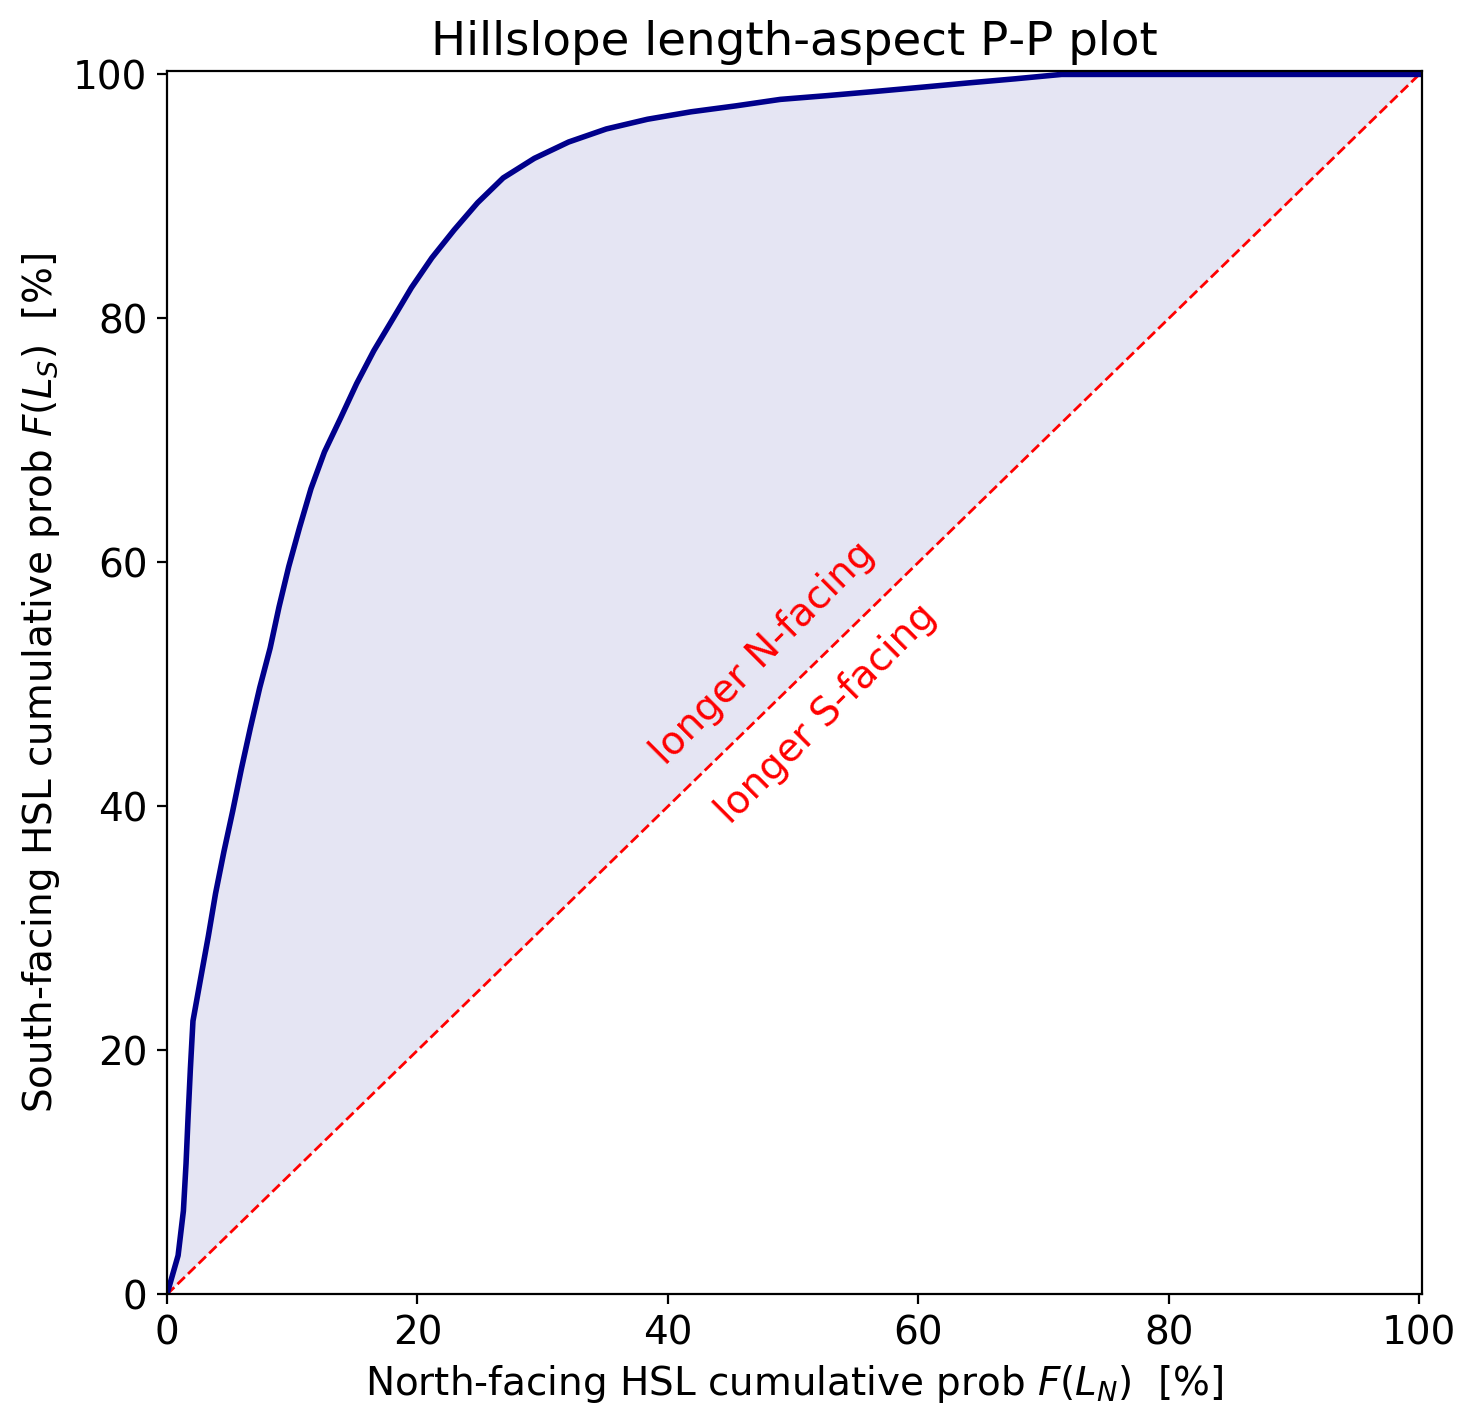

In [23]:
sl.plot.plot_hsl_distributions()

In [24]:
df = sl.mapping.hsl_stats_df
df[:30].style.format("{:.3g}").set_properties(**{'font-size':'140%'}) \
         .set_caption('Hillslope length statistics:')
df.mean()

count        NaN
mean [m]     NaN
stddev [m]   NaN
dtype: float64

## Export plots

In [25]:
sl.plot.figs

{'roi_shaded_relief': <Figure size 810x810 with 1 Axes>,
 'streamlines': <Figure size 900x900 with 1 Axes>,
 'channels': <Figure size 900x900 with 1 Axes>,
 'label': <Figure size 900x900 with 1 Axes>,
 'hsl': <Figure size 990x990 with 2 Axes>,
 'hsl_contours': <Figure size 900x900 with 2 Axes>,
 'aspect': <Figure size 945x945 with 2 Axes>,
 'hsl_aspect_distribution': <Figure size 900x900 with 1 Axes>,
 'hsl_nsall_distbn': <Figure size 800x800 with 2 Axes>,
 'hsl_ns_qq': <Figure size 810x810 with 1 Axes>,
 'hsl_ns_pp': <Figure size 810x810 with 1 Axes>}

In [26]:
sl.save.do()


**Write results to files begin**
Saving maps...
/Users/colinstark/Work/Streamlines/slmxpt/GabilanMesa6/GabilanMesa6_dtm_mask.tif (1924, 884)
/Users/colinstark/Work/Streamlines/slmxpt/GabilanMesa6/GabilanMesa6_basin_mask.tif (1924, 884)
/Users/colinstark/Work/Streamlines/slmxpt/GabilanMesa6/GabilanMesa6_uv.tif (1924, 884, 2)
/Users/colinstark/Work/Streamlines/slmxpt/GabilanMesa6/GabilanMesa6_slope.tif (1924, 884)
/Users/colinstark/Work/Streamlines/slmxpt/GabilanMesa6/GabilanMesa6_mapping.tif (1924, 884)
/Users/colinstark/Work/Streamlines/slmxpt/GabilanMesa6/GabilanMesa6_coarse_subsegment.tif (1924, 884)
/Users/colinstark/Work/Streamlines/slmxpt/GabilanMesa6/GabilanMesa6_merged_coarse_mask.tif (1924, 884)
/Users/colinstark/Work/Streamlines/slmxpt/GabilanMesa6/GabilanMesa6_hsl.tif (1924, 884)
/Users/colinstark/Work/Streamlines/slmxpt/GabilanMesa6/GabilanMesa6_hsl_smoothed.tif (1924, 884)
/Users/colinstark/Work/Streamlines/slmxpt/GabilanMesa6/GabilanMesa6_aspect.tif (1924, 884)
/Users/col